In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('dataset_group.csv')
df.sample(5)

,Date,Order_id,Product
17127,11-08-2019,952,cheeses
19654,23-01-2020,1086,pork
10710,08-02-2019,598,all- purpose
6408,08-07-2018,369,lunch meat
4521,13-05-2018,257,dinner rolls


In [3]:
print(df.Product.value_counts().sort_values(ascending=False))
print('\n')

poultry                         640
soda                            597
cereals                         591
ice cream                       579
cheeses                         578
waffles                         575
soap                            574
bagels                          573
lunch meat                      573
juice                           570
eggs                            570
toilet paper                    569
dinner rolls                    567
aluminum foil                   566
coffee/tea                      565
shampoo                         562
beef                            561
paper towels                    556
milk                            555
flour                           555
butter                          555
mixes                           554
dishwashing liquid/detergent    551
all- purpose                    551
ketchup                         548
yogurt                          545
individual meals                544
tortillas                   

In [4]:
df[["day", "month", "year"]] = df["Date"].str.split("-", expand = True)
df.head()

,Date,Order_id,Product,day,month,year
0,01-01-2018,1,yogurt,01,01,2018
1,01-01-2018,1,pork,01,01,2018
2,01-01-2018,1,sandwich bags,01,01,2018
3,01-01-2018,1,lunch meat,01,01,2018
4,01-01-2018,1,all- purpose,01,01,2018


In [5]:
print("Number of rows-",df.shape[0],"\nNumber of columns-",df.shape[1])

Number of rows- 20641 
Number of columns- 6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
 3   day       20641 non-null  object
 4   month     20641 non-null  object
 5   year      20641 non-null  object
dtypes: int64(1), object(5)
memory usage: 967.7+ KB


In [7]:
df.isnull().sum()

Date        0
Order_id    0
Product     0
day         0
month       0
year        0
dtype: int64

In [8]:
df.Product.unique()

array(['yogurt', 'pork', 'sandwich bags', 'lunch meat', 'all- purpose',
       'flour', 'soda', 'butter', 'beef', 'aluminum foil', 'dinner rolls',
       'shampoo', 'mixes', 'soap', 'laundry detergent', 'ice cream',
       'toilet paper', 'hand soap', 'waffles', 'cheeses', 'milk',
       'dishwashing liquid/detergent', 'individual meals', 'cereals',
       'tortillas', 'spaghetti sauce', 'ketchup', 'sandwich loaves',
       'poultry', 'bagels', 'eggs', 'juice', 'pasta', 'paper towels',
       'coffee/tea', 'fruits', 'sugar'], dtype=object)

In [9]:
df.duplicated().sum()

4730

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(15911, 6)

In [12]:
df["BillDate"] = pd.to_datetime(df['Date'])
df["Day"] = df["BillDate"].dt.day_name()
df.head()

,Date,Order_id,Product,day,month,year,BillDate,Day
0,01-01-2018,1,yogurt,01,01,2018,2018-01-01,Monday
1,01-01-2018,1,pork,01,01,2018,2018-01-01,Monday
2,01-01-2018,1,sandwich bags,01,01,2018,2018-01-01,Monday
3,01-01-2018,1,lunch meat,01,01,2018,2018-01-01,Monday
4,01-01-2018,1,all- purpose,01,01,2018,2018-01-01,Monday


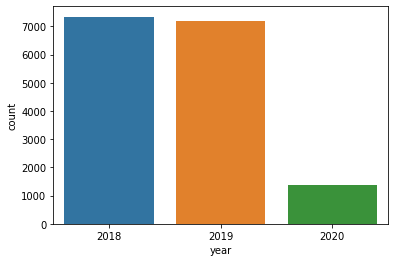

In [13]:
import seaborn as sns
sns.countplot(df["year"].astype(int))
plt.show()

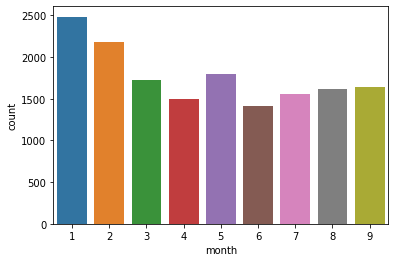

In [14]:
sns.countplot(df["month"].astype(int))
plt.show()

<AxesSubplot:>

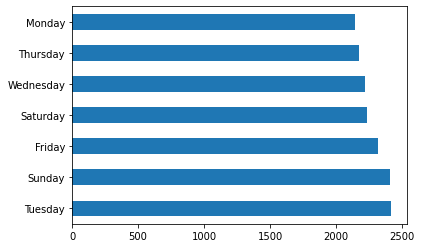

In [15]:
df['Day'].value_counts().plot(kind='barh')

In [16]:
fig, ax = plt.subplots(figsize=(40,40))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(35)
df['Product'].value_counts().plot(kind='barh',order )
plt.xlabel('Count', fontsize=70)
plt.ylabel('Product', fontsize=70)
plt.show()
plt.tight_layout()

SyntaxError: positional argument follows keyword argument (<ipython-input-16-9d5fd25345b7>, line 4)

In [ ]:
df.profile_report()